In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/training_data_telugu-hate.xlsx')
df.head()

,S.No,Comments,Label
0,HATE_2857,\nDr YNM\n1 month ago\nఇందులో మనం పెద్దగా ఆలోచ...,non-hate
1,HATE_2969,\nlakshmankumar kavali\nNext Step is tdp vallu...,non-hate
2,HATE_1985,\n​trs party lo telangana kosam poradina valle...,non-hate
3,HATE_2974,\nఅన్నయ్య ప్రింటింగ్ మిషన్ ద్వారా 6093 కోట్ల ర...,non-hate
4,HATE_2810,\nఏముంది పదవికోసం గుధ్ధ కూడా నాకేస్తారు ఈ రాజక...,non-hate


In [3]:
df.shape

(3200, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   S.No      3200 non-null   object
 1   Comments  3200 non-null   object
 2   Label     3200 non-null   object
dtypes: object(3)
memory usage: 75.1+ KB


In [ ]:
#Testing dataset
dft= pd.read_excel('/content/test_data_telugu-hate.xlsx')
dft.head()

## EDA

In [38]:
dft.shape

(800, 3)

In [39]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   S.No      800 non-null    object
 1   Comments  800 non-null    object
 2   Label     800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


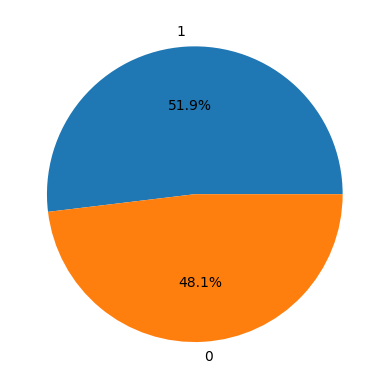

In [35]:
#In training dataset
plt.pie(df['Label'].value_counts().values,
        labels = df['Label'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

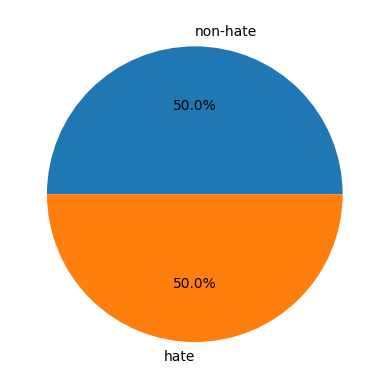

In [40]:
#In testing dataset
plt.pie(dft['Label'].value_counts().values,
        labels = dft['Label'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

## Preprocessing for Training Dataset

### Removing Punctuations & Lower Casing

In [6]:
# Lower case all the words of the tweet before any preprocessing
df['Comments'] = df['Comments'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

df['Comments']= df['Comments'].apply(lambda x: remove_punctuations(x))
df.head()

,S.No,Comments,Label
0,HATE_2857,\ndr ynm\n1 month ago\nఇందులో మనం పెద్దగా ఆలోచ...,non-hate
1,HATE_2969,\nlakshmankumar kavali\nnext step is tdp vallu...,non-hate
2,HATE_1985,\n​trs party lo telangana kosam poradina valle...,non-hate
3,HATE_2974,\nఅన్నయ్య ప్రింటింగ్ మిషన్ ద్వారా 6093 కోట్ల ర...,non-hate
4,HATE_2810,\nఏముంది పదవికోసం గుధ్ధ కూడా నాకేస్తారు ఈ రాజక...,non-hate


### Removing English Stopwords 

In [7]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():

        if word not in stop_words:

            # Let's Lemmatize the word as well
            # before appending to the imp_words list.

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['Comments'] = df['Comments'].apply(lambda text: remove_stopwords(text))
df.head()

,S.No,Comments,Label
0,HATE_2857,dr ynm 1 month ago ఇందులో మనం పెద్దగా ఆలోచించా...,non-hate
1,HATE_2969,lakshmankumar kavali next step tdp vallu money...,non-hate
2,HATE_1985,​trs party lo telangana kosam poradina valle u...,non-hate
3,HATE_2974,అన్నయ్య ప్రింటింగ్ మిషన్ ద్వారా 6093 కోట్ల రూప...,non-hate
4,HATE_2810,ఏముంది పదవికోసం గుధ్ధ కూడా నాకేస్తారు ఈ రాజకీయ...,non-hate


### Removing Telugu Stopwords 

In [8]:
def remove_stopwords1(text):
    #stop_words = stopwords.words('telugu')
    stop_words = [ 'అండ్లో', 'అండుకే', 'అండ్లు', 'అండుకు', 'అండ్లోకి', 'అండ్లే', 'అండి', 'అండిపోయి',
    'అందరి', 'అండిచే', 'అండికి', 'అండిని', 'అండినికి', 'అండిపడటం', 'అండిపడిపోయి', 'అండిపడానికి',
    'అండిపడాను', 'అండిపడారు', 'అండిపడాస్తాను', 'అండిపడాస్తారు', 'అండిపడాస్తారా', 'అండిపడిస్తుంది', 'అండిపడిస్తుందా',
    'అండిపడే', 'అండిపడేది', 'అండిపడేవారు', 'అండిపడేవారా', 'అండిపడేవారే', 'అండిపడోదాన్ని', 'అండిపడోదాన్నే', 'అండిపడోదాన్నారు']
    imp_words = []

    # Storing the important words
    for word in str(text).split():

        if word not in stop_words:

            # Let's Lemmatize the word as well
            # before appending to the imp_words list.

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['Comments'] = df['Comments'].apply(lambda text: remove_stopwords1(text))
df.head()

,S.No,Comments,Label
0,HATE_2857,dr ynm 1 month ago ఇందులో మనం పెద్దగా ఆలోచించా...,non-hate
1,HATE_2969,lakshmankumar kavali next step tdp vallu money...,non-hate
2,HATE_1985,​trs party lo telangana kosam poradina valle u...,non-hate
3,HATE_2974,అన్నయ్య ప్రింటింగ్ మిషన్ ద్వారా 6093 కోట్ల రూప...,non-hate
4,HATE_2810,ఏముంది పదవికోసం గుధ్ధ కూడా నాకేస్తారు ఈ రాజకీయ...,non-hate


### Transliteration of Telugu script to English

In [16]:
!pip install indic-transliteration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.2/146.2 kB 2.9 MB/s eta 0:00:00


In [18]:
from indic_transliteration import sanscript

def transliterate_telugu_to_english(text):
    return sanscript.transliterate(text, sanscript.TELUGU, sanscript.ITRANS)

df['Comments'] = df['Comments'].apply(transliterate_telugu_to_english)
df.head(5)

,S.No,Comments,Label
0,HATE_2857,dr ynm 1 month ago iMdulo manaM pèddagA Alochi...,non-hate
1,HATE_2969,lakshmankumar kavali next step tdp vallu money...,non-hate
2,HATE_1985,​trs party lo telangana kosam poradina valle u...,non-hate
3,HATE_2974,annayya priMTiMg miShan dvArA 6093 koTla rUpAy...,non-hate
4,HATE_2810,emuMdi padavikosaM gudhdha kUDA nAkestAru I rA...,non-hate


### Visualization of Repeated words

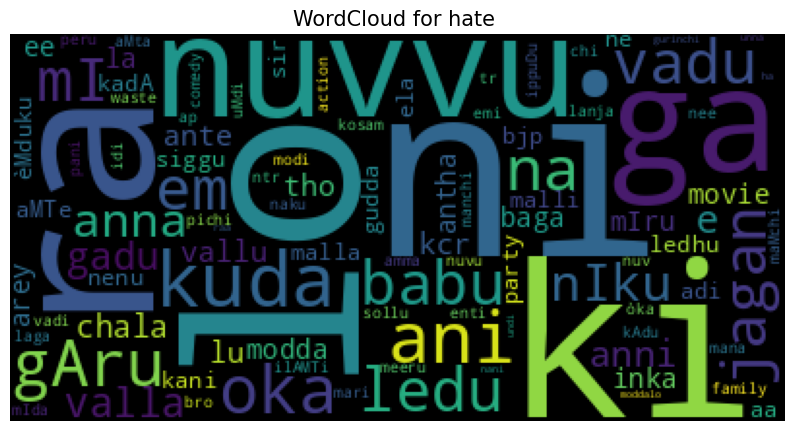

In [21]:
def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['Comments'])

  plt.figure(figsize = (10,10))

  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 400,
                height = 200,
                collocations = False).generate(email_corpus)

  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} ', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['Label']=='hate'], typ='hate')

### Tokenizing Comments

In [25]:
import nltk
nltk.download('punkt')


True

In [30]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download the Punkt Tokenizer Models
nltk.download('punkt')

# Assuming 'Comments' and 'Label' are the columns in your DataFrame df
hate_comments = df[df['Label'] == 'hate']['Comments']

# Combine all hate comments into a single string
hate_comments_text = " ".join(hate_comments)

# Tokenize the text into words
words = word_tokenize(hate_comments_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))  # Adjust for Telugu stopwords if needed
filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Print the top 10 most common words
top_10_words = word_counts.most_common(10)
print("Top 10 most used words in hate comments:")
for word, count in top_10_words:
    print(f"{word}: {count}")


Top 10 most used words in hate comments:
ni: 143
lo: 134
ki: 132
ra: 127
ga: 84
nuvvu: 81
kuda: 76
ani: 68
oka: 58
garu: 53


### Converting hate/non hate Label to binary integers 0/1

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])
df.head()

,S.No,Comments,Label
0,HATE_2857,dr ynm 1 month ago iMdulo manaM pèddagA Alochi...,1
1,HATE_2969,lakshmankumar kavali next step tdp vallu money...,1
2,HATE_1985,​trs party lo telangana kosam poradina valle u...,1
3,HATE_2974,annayya priMTiMg miShan dvArA 6093 koTla rUpAy...,1
4,HATE_2810,emuMdi padavikosaM gudhdha kUDA nAkestAru I rA...,1


## Preprocessing for Testing Datset

### Removing Punctuations & Lower Casing

In [41]:
# Lower case all the words of the tweet before any preprocessing
dft['Comments'] = dft['Comments'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
dft['Comments']= dft['Comments'].apply(lambda x: remove_punctuations(x))


,S.No,Comments,Label
0,HATE_2857,dr ynm 1 month ago iMdulo manaM pèddagA Alochi...,1
1,HATE_2969,lakshmankumar kavali next step tdp vallu money...,1
2,HATE_1985,​trs party lo telangana kosam poradina valle u...,1
3,HATE_2974,annayya priMTiMg miShan dvArA 6093 koTla rUpAy...,1
4,HATE_2810,emuMdi padavikosaM gudhdha kUDA nAkestAru I rA...,1


In [42]:
dft.head()

,S.No,Comments,Label
0,HATE_4271,\nవిజయ్ దేవరకొండ గురించి చెప్పింది చాలా పర్ఫెక...,non-hate
1,HATE_4977,నిన్ను కూడా ఎవరు నమ్మరు మీ నాయకుడు గురించి క...,hate
2,HATE_4321,కెజియఫ్ మనిషి ఒంటరివాడైనా ధైర్యంగా పరిస్థితులత...,non-hate
3,HATE_4444,0 pellillu chesukoni padimandini kanakoodaduja...,non-hate
4,HATE_1594,100 literacy rate unna kerala lo ne janalu gor...,hate


### Removing Stopwords 

In [43]:
dft['Comments'] = dft['Comments'].apply(lambda text: remove_stopwords(text))
dft.head()

,S.No,Comments,Label
0,HATE_4271,విజయ్ దేవరకొండ గురించి చెప్పింది చాలా పర్ఫెక్ట...,non-hate
1,HATE_4977,నిన్ను కూడా ఎవరు నమ్మరు మీ నాయకుడు గురించి కూడ...,hate
2,HATE_4321,కెజియఫ్ మనిషి ఒంటరివాడైనా ధైర్యంగా పరిస్థితులత...,non-hate
3,HATE_4444,0 pellillu chesukoni padimandini kanakoodaduja...,non-hate
4,HATE_1594,100 literacy rate unna kerala lo ne janalu gor...,hate


In [44]:
dft['Comments'] = dft['Comments'].apply(lambda text: remove_stopwords1(text))
dft.head()

,S.No,Comments,Label
0,HATE_4271,విజయ్ దేవరకొండ గురించి చెప్పింది చాలా పర్ఫెక్ట...,non-hate
1,HATE_4977,నిన్ను కూడా ఎవరు నమ్మరు మీ నాయకుడు గురించి కూడ...,hate
2,HATE_4321,కెజియఫ్ మనిషి ఒంటరివాడైనా ధైర్యంగా పరిస్థితులత...,non-hate
3,HATE_4444,0 pellillu chesukoni padimandini kanakoodaduja...,non-hate
4,HATE_1594,100 literacy rate unna kerala lo ne janalu gor...,hate


### Transliterate Telugu script to English script

In [ ]:
dft['Comments'] = dft['Comments'].apply(transliterate_telugu_to_english)


In [46]:
dft.head()

,S.No,Comments,Label
0,HATE_4271,vijay devarakòMDa guriMchi chèppiMdi chAlA par...,non-hate
1,HATE_4977,ninnu kUDA èvaru nammaru mI nAyakuDu guriMchi ...,hate
2,HATE_4321,kèjiyaph maniShi òMTarivADainA dhairyaMgA pari...,non-hate
3,HATE_4444,0 pellillu chesukoni padimandini kanakoodaduja...,non-hate
4,HATE_1594,100 literacy rate unna kerala lo ne janalu gor...,hate


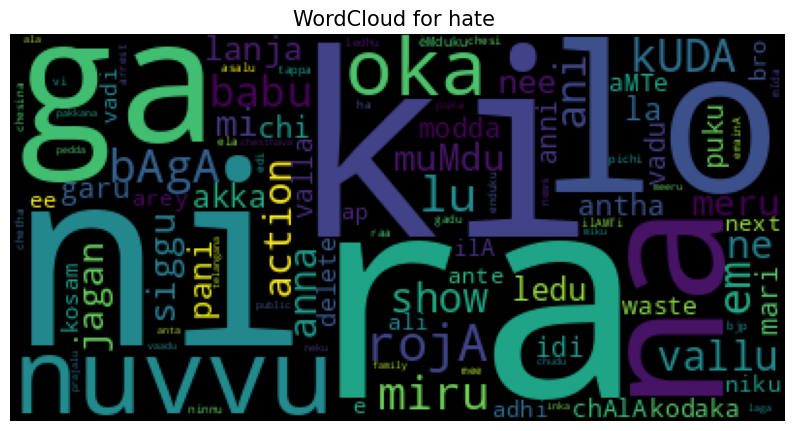

In [48]:
plot_word_cloud(dft[dft['Label']=='hate'], typ='hate')

### Converting Label to Binary Integers

In [49]:
label_encoder = LabelEncoder()
dft['Label'] = label_encoder.fit_transform(dft['Label'])
dft.head()

,S.No,Comments,Label
0,HATE_4271,vijay devarakòMDa guriMchi chèppiMdi chAlA par...,1
1,HATE_4977,ninnu kUDA èvaru nammaru mI nAyakuDu guriMchi ...,0
2,HATE_4321,kèjiyaph maniShi òMTarivADainA dhairyaMgA pari...,1
3,HATE_4444,0 pellillu chesukoni padimandini kanakoodaduja...,1
4,HATE_1594,100 literacy rate unna kerala lo ne janalu gor...,0


## Model Building

In [50]:
X_train = df['Comments']
Y_train = df['Label']
X_val=dft['Comments']
Y_val=dft['Label']
X_train.shape, X_val.shape

((3200,), (800,))

In [51]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((3200, 2), (800, 2))

In [67]:
print(Y_train)

      0  1
0     0  1
1     0  1
2     0  1
3     0  1
4     0  1
...  .. ..
3195  0  1
3196  0  1
3197  1  0
3198  1  0
3199  0  1

[3200 rows x 2 columns]


### Tokenizing Words

In [52]:

max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
                  lower=True,
                  split=' ')

token.fit_on_texts(X_train)

In [73]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,lower=True, split=' ')
token.fit_on_texts(X_train)

#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,maxlen=100,padding='post',truncating='post')

Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,maxlen=100,padding='post',truncating='post')

In [68]:
print(Testing_seq)

[[296, 3215, 111, 1083, 5, 6, 169, 213], [184, 8, 198, 13, 347, 111, 8, 1445, 26], [148, 728, 1959, 148, 244, 54, 1101, 217, 52], [2049], [189, 2108, 54, 1, 63, 709, 45, 234, 54, 709, 684, 2464, 382, 1144, 2119, 941], [524, 1, 37], [2998, 1652, 209, 209, 308, 1518, 2535], [251], [1836], [316, 476, 937, 693, 137, 1855, 552, 2962, 177, 2], [86], [238, 4949], [4, 41, 563, 23, 123, 4], [131, 13, 1225, 649, 140, 136, 1718, 1647], [216, 1448, 1584, 150, 50], [216, 3, 4003, 573, 1625, 20, 305, 91, 305, 6], [216, 305, 17, 2483], [125, 8, 1815], [49, 520, 17, 320, 17], [2542, 4983, 1, 2196], [2542, 3, 9, 25], [607], [3996, 1123, 484, 469, 1584, 4279, 293, 2376, 44, 240], [1404, 1629, 130, 5, 24, 176, 1404, 1629], [17, 177, 3400, 129, 249, 140], [2930, 1166], [2930, 13, 918, 11, 41, 119, 1540, 408, 121, 587], [303, 3, 2002, 3951, 3952, 11, 325, 3953], [532, 370, 30, 89], [537, 2, 1650], [1408, 120, 872, 109, 17], [4, 78, 943], [4, 90, 92, 2520], [4, 159], [193, 171], [4002, 623], [4, 138, 1, 3, 

## Model Development and Evaluation

In [60]:
model = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=max_len),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 512)               16896     
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                

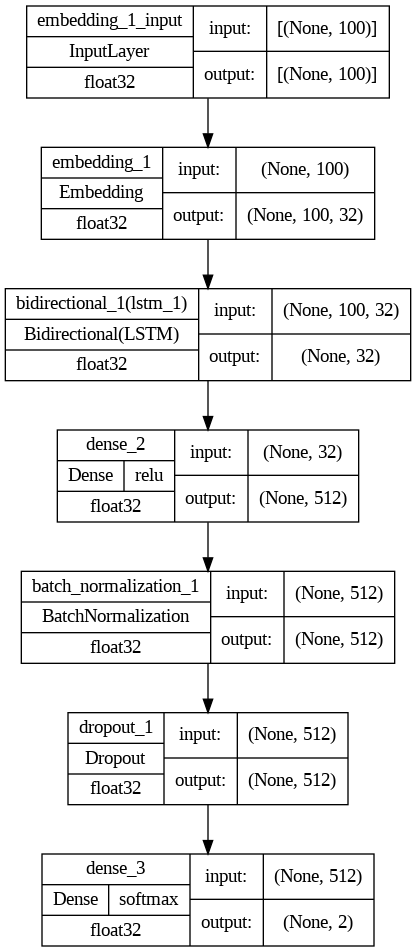

In [61]:

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [62]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,monitor = 'val_accuracy',restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,monitor = 'val_loss',factor = 0.5,verbose = 0)

In [74]:
history = model.fit(Training_pad, Y_train,validation_data=(Testing_pad, Y_val),
                    epochs=50,verbose=1,batch_size=32,callbacks=[lr, es])

Epoch 1/50
100/100 [==============================] - 13s 70ms/step - loss: 3.7936 - accuracy: 0.6666 - val_loss: 0.8492 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 5s 53ms/step - loss: 0.4663 - accuracy: 0.8378 - val_loss: 0.7197 - val_accuracy: 0.5575 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 7s 72ms/step - loss: 0.2648 - accuracy: 0.9209 - val_loss: 0.6751 - val_accuracy: 0.6263 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 5s 49ms/step - loss: 0.1855 - accuracy: 0.9553 - val_loss: 0.6150 - val_accuracy: 0.7225 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 7s 73ms/step - loss: 0.1419 - accuracy: 0.9722 - val_loss: 0.6220 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 5s 53ms/step - loss: 0.1299 - accuracy: 0.9731 - val_loss: 0.7031 - val_accuracy: 0.7138 - lr: 0.0010
Epoch 7/50
100/100 [==============================] - 5s 54ms/s

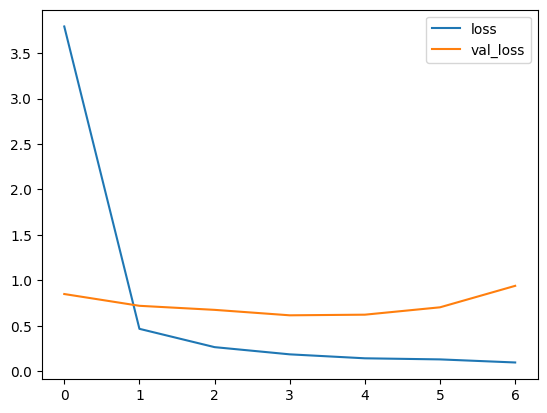

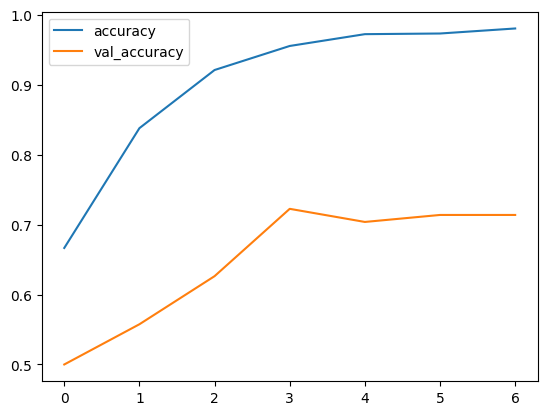

In [75]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

## Test on  unlabelled dataset

In [78]:
dfn=pd.read_excel('/content/telugu_test_without_labels.xlsx')

In [82]:
import pandas as pd

# Assuming 'your_data.xlsx' is the Excel file
df_test = pd.read_excel('/content/telugu_test_without_labels.xlsx', header=None, names=['Number', 'Telugu_Text'])


In [83]:
df_test.head()

,Number,Telugu_Text
0,1,ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూ...
1,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.
2,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే ...
3,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగ...
4,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలన...


In [79]:
dfn.head()

,1,"ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూపర్ మా,,"
0,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.
1,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే ...
2,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగ...
3,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలన...
4,6,వావ్ సూపర్ అమ్మ god bless u తల్లి


##Preprocessing

In [86]:
df_test['Telugu_english'] = df_test['Telugu_Text'].apply(transliterate_telugu_to_english)

In [87]:
df_test.head()

,Number,Telugu_Text,Telugu_english
0,1,ఎన్ని సార్లు అయిన వినాలని ఉంది చిట్టి తల్లి సూ...,ènni sArlu ayina vinAlani uMdi chiTTi talli sU...
1,2,ఫ్యూచర్ లో బాగ work out అవుతుంది సూపర్.,phyUchar lo bAga work out avutuMdi sUpar.
2,3,ఇది బెండపూడి గవ్నమెంట్ స్టూడెంట్స్ కి మాత్రమే ...,idi bèMDapUDi gavnamèMT sTUDèMTs ki mAtrame sA...
3,4,తెలుగులో మాట్లాడినప్పుడు చాలా అందంగా వినసొంపుగ...,tèlugulo mATlADinappuDu chAlA aMdaMgA vinasòMp...
4,5,సూపర్ సిస్టర్ ఫ్యూచర్ లో రైల్వే లో జాబ్ రావాలన...,sUpar sisTar phyUchar lo railve lo jAb rAvAlan...


In [99]:
punctuations_list = string.punctuation
df_test['Telugu_english']= df_test['Telugu_english'].apply(lambda x: remove_punctuations(x))

In [101]:
df_test['Telugu_english'] = df_test['Telugu_english'].str.lower()

In [102]:
# Tokenize and pad Telugu English text
"""from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000, lower=True, split=' ')
tokenizer.fit_on_texts()"""
telugu_english_sequences = token.texts_to_sequences(df_test['Telugu_english'])
telugu_english_padded = pad_sequences(telugu_english_sequences, maxlen=100, padding='post', truncating='post')


In [103]:
print(telugu_english_padded)

[[ 395  369   81 ...    0    0    0]
 [   1   24  870 ...    0    0    0]
 [  68    2  432 ...    0    0    0]
 ...
 [ 372  218 1792 ...    0    0    0]
 [  70  208  558 ...    0    0    0]
 [  98  238    0 ...    0    0    0]]


In [104]:
predictions = model.predict(telugu_english_padded)



16/16 [==============================] - 0s 15ms/step


In [105]:
predicted_labels = predictions.argmax(axis=1)


In [106]:
labels = ['non-hate' if label == 0 else 'hate' for label in predicted_labels]
results_df = pd.DataFrame({'Number': df_test['Number'], 'Telugu_Text': df_test['Telugu_Text'], 'Telugu_English': df_test['Telugu_english'], 'Label': labels})


In [107]:
results_df.to_csv('model_predictions_with_labels1.csv', index=False)